In [61]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

(x_train, y_train),(x_test, y_test) = keras.datasets.cifar10.load_data()

# how many claasses
NUM_CLASSES = 10

# Normalizing
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Make labels to one hot
y_train = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = keras.utils.to_categorical(y_test, NUM_CLASSES)

## Keras 순전파

In [62]:
# Make layers for MLP (분류를 위한 다층 퍼셉트론)

# Sequential Model:
# 첫 번째 방법은 Sequential 모델을 사용하여 MLP를 정의하는 것입니다.
# Sequential 모델은 레이어를 순차적으로 쌓아서 모델을 생성하는 간단한 방법입니다.
# 이 방법은 모델의 입력부터 출력까지 레이어를 순서대로 나열하여 모델을 정의합니다.
# 이 방법은 간단하고 명확하며, 모델의 구조가 순차적인 경우에 적합합니다.
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(200, activation= 'relu'),
    keras.layers.Dense(150, activation= 'relu'),
    keras.layers.Dense(10, activation= 'softmax'),
])

model.summary()

# Functional API Model:
# 두 번째 방법은 Functional API를 사용하여 MLP를 정의하는 것입니다.
# Functional API는 보다 유연한 모델 구조를 정의할 수 있도록 해줍니다.
# 이 방법은 입력 레이어와 출력 레이어를 정의하고, 그 사이에 레이어를 연결하는 방식으로 모델을 구성합니다.
# 이 방법은 다양한 레이어 구조와 복잡한 모델 구조를 생성하는 데 유용하며,
# 다중 입력 또는 다중 출력 모델을 만들 수 있습니다.
input_layer = keras.layers.Input(shape=(32,32,3))
x = keras.layers.Flatten()(input_layer)
x = keras.layers.Dense(units=200, activation = 'relu')(x)
x = keras.layers.Dense(units=150, activation = 'relu')(x)
output_layer = keras.layers.Dense(units=10, activation = 'softmax')(x)
model = keras.models.Model(input_layer, output_layer)

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_22 (Flatten)        (None, 3072)              0         
                                                                 
 dense_54 (Dense)            (None, 200)               614600    
                                                                 
 dense_55 (Dense)            (None, 150)               30150     
                                                                 
 dense_56 (Dense)            (None, 10)                1510      
                                                                 
Total params: 646260 (2.47 MB)
Trainable params: 646260 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


## 손실함수 및 옵티마이저

In [63]:
# 모델 준비(컴파일)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [64]:
# 모델 훈련 이코드부분을 다시 실행시켜도 이어서 학습이 됨.
model.fit(x_train,
          y_train,
          batch_size=32,
          epochs=10,
          shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8518 - accuracy: 0.3309
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6704 - accuracy: 0.4000
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5940 - accuracy: 0.4294
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5473 - accuracy: 0.4457
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5200 - accuracy: 0.4575
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4942 - accuracy: 0.4663
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4722 - accuracy: 0.4745
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4528 - accuracy: 0.4812
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4356 - accuracy: 0.4881
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.419

313/313 [==============================] - 0s 1ms/step


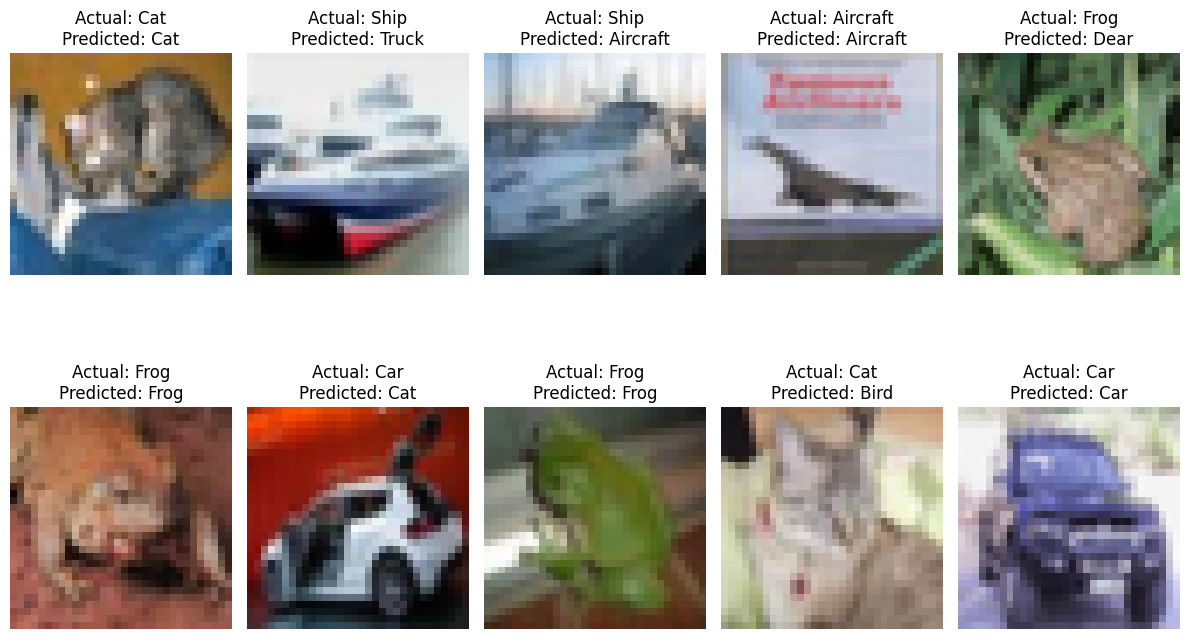

In [68]:
# 모델 평가하기
model.evaluate(x_test,y_test)

classes=np.array(['Aircraft','Car','Bird','Cat','Dear','Dog','Frog','Horse','Ship','Truck'])
preds = model.predict(x_test)

preds_single = classes[np.argmax(preds, axis=-1)]
actual_single = classes[np.argmax(y_test,axis=-1)]

import matplotlib.pyplot as plt

# 몇 개의 예측 결과를 시각화할 것인지 설정
n_t_show = 10

# 테스트 데이터와 예측 결과 가져오기
x_samples = x_test[:n_t_show]
predicted_classes = preds_single[:n_t_show]
actual_classes = actual_single[:n_t_show]

# 예측 결과 시각화
plt.figure(figsize=(12, 8))
for i in range(n_t_show):
    plt.subplot(2, n_t_show // 2, i + 1)
    plt.imshow(x_samples[i])
    plt.title(f'Actual: {actual_classes[i]}\nPredicted: {predicted_classes[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()
